## ㅁOne Point Tutorial IV
# `Pivot`
<p style='text-align: right;'> 빅데이터 분석 중고급과정 with 관악구, KMR</p>
<p style='text-align: right;'> 2023 2nd | All rights reserved by Wooseok Song</p>

---

# Aggregation & Pivot table

In [89]:
import pandas as pd
import numpy as np

In [11]:
df = pd.DataFrame({'key1': ['a', 'a', 'b', 'b', 'a'], 
                   'key2': ['one', 'two', 'one', 'two', 'one'], 
                   'data1': np.random.randn(5), 
                   'data2' : np.random.randn(5)})

In [14]:
df.groupby('key1')['data1'].mean() # Series로 뽑고 싶다면?

key1
a   -0.709548
b   -0.801970
Name: data1, dtype: float64

In [15]:
df.groupby('key1')[['data1']].mean() # DataFrame으로 뽑고 싶다면?

,data1
key1,
a,-0.709548
b,-0.801970


In [16]:
df['data1'] # Series로 뽑고 싶다면?

0    1.084287
1   -1.698950
2   -0.293647
3   -1.310293
4   -1.513982
Name: data1, dtype: float64

In [17]:
df[['data1']] # DataFrame으로 뽑고 싶다면?

,data1
0,1.084287
1,-1.698950
2,-0.293647
3,-1.310293
4,-1.513982


## 1. Split-Apply-Combine (Aggregation)

groupby로 흩어진 dataframe을 $\rightarrow$ scalar/array/dataframe로 변환하여 **취합**하는

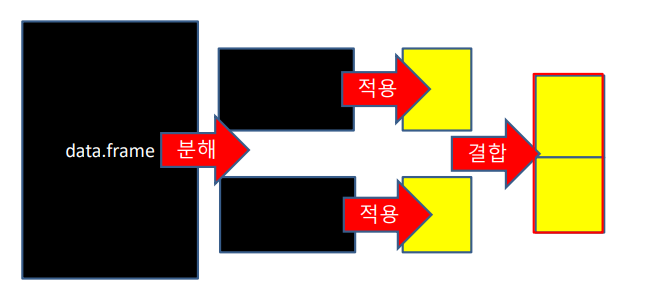

위의 그림에서 적용하고 결합하는 과정을 의미한다,

In [23]:
np.random.seed(0)
np.random.uniform(50,100,10).astype(np.int)

array([77, 85, 80, 77, 71, 82, 71, 94, 98, 69])

In [24]:
df1 = pd.DataFrame(_.reshape(5,2), columns=['exam1', 'exam2'])
df1

,exam1,exam2
0,77,85
1,80,77
2,71,82
3,71,94
4,98,69


In [25]:
df2 = pd.DataFrame(['a', 'b', 'a', 'b', 'ab'], columns=['blood_type'])
df2

,blood_type
0,a
1,b
2,a
3,b
4,ab


In [33]:
df3 = pd.merge(df1, df2, on = df1.index).drop(['key_0'], axis = 1)
df3

,exam1,exam2,blood_type
0,77,85,a
1,80,77,b
2,71,82,a
3,71,94,b
4,98,69,ab


In [36]:
df3.groupby('blood_type').apply(sum)[['exam1']]

,exam1
blood_type,
a,148
ab,98
b,151


In [37]:
df3.groupby('blood_type').apply(np.mean) # 시험 1은 ab형이 시험 2는 b형이 잘봤다.

,exam1,exam2
blood_type,,
a,74.0,83.5
ab,98.0,69.0
b,75.5,85.5


In [38]:
def custom_mean(data_frame):
    return data_frame.mean(axis = 0)
df3.groupby('blood_type').apply(custom_mean) # 이 밖에도 정말 수많은 방법으로 같은 aggregation을 할 수 있다.

,exam1,exam2
blood_type,,
a,74.0,83.5
ab,98.0,69.0
b,75.5,85.5


In [42]:
df3.describe().round(1)

,exam1,exam2
count,5.0,5.0
mean,79.4,81.4
std,11.1,9.3
min,71.0,69.0
25%,71.0,77.0
50%,77.0,82.0
75%,80.0,85.0
max,98.0,94.0


In [43]:
df4 = pd.concat((df3, pd.DataFrame(['m', 'f', 'm', 'm', 'f'], columns=['gender'])), axis=1)

In [44]:
df4.groupby(['blood_type', 'gender']).apply(custom_mean)

exam1  exam2
blood_type gender              
a          m        74.0   83.5
ab         f        98.0   69.0
b          f        80.0   77.0
           m        71.0   94.0

In [45]:
_.index # MultiIndex의 등장

MultiIndex([( 'a', 'm'),
            ('ab', 'f'),
            ( 'b', 'f'),
            ( 'b', 'm')],
           names=['blood_type', 'gender'])

우리의 흩어진 조각들은 DataFrame이고 이 안에는 mean이라는 함수가 있다.

apply말고 agg로 aggregation을 한다면 외부 함수 말고 DataFrame이 가지고 있는 메소드도 사용할 수 있다.

In [46]:
df4.groupby(['blood_type', 'gender']).apply(np.mean)

exam1  exam2
blood_type gender              
a          m        74.0   83.5
ab         f        98.0   69.0
b          f        80.0   77.0
           m        71.0   94.0

In [47]:
df4.groupby(['blood_type', 'gender']).apply(np.mean).reset_index() # multi_index된 최종 결과물을 tidy한 format으로 바꾸고 싶다면

,blood_type,gender,exam1,exam2
0,a,m,74.0,83.5
1,ab,f,98.0,69.0
2,b,f,80.0,77.0
3,b,m,71.0,94.0


우리는 지금 껏 categorical variable이 주어진 상태에서 split을 하였지만, numerical variable을 잘라서 (분위)분석을 하고 싶을 떄가 있다.

In [48]:
pd.cut(df3.exam1, 2)

0    (70.973, 84.5]
1    (70.973, 84.5]
2    (70.973, 84.5]
3    (70.973, 84.5]
4      (84.5, 98.0]
Name: exam1, dtype: category
Categories (2, interval[float64]): [(70.973, 84.5] < (84.5, 98.0]]

In [49]:
pd.qcut(df3.exam1, 2)

0    (70.999, 77.0]
1      (77.0, 98.0]
2    (70.999, 77.0]
3    (70.999, 77.0]
4      (77.0, 98.0]
Name: exam1, dtype: category
Categories (2, interval[float64]): [(70.999, 77.0] < (77.0, 98.0]]

In [50]:
pd.qcut(df3.exam1, 2, labels=['low', 'high'])

0     low
1    high
2     low
3     low
4    high
Name: exam1, dtype: category
Categories (2, object): [low < high]

예를 들어, 시험1의 성적의 상위권 학생의 성적이 시험2에서도 유지될 지 궁금하다면?

In [51]:
df3.exam2.groupby(_).mean() # 오히려 하위권 학생의 성적이 높다.

exam1
low     87
high    73
Name: exam2, dtype: int32

group 연산으로 결측치를 채울 수도 있다. 상기하였듯, dataframe을 split을 한 뒤에 dataframe을 그대로 뽑을 수 있다.

In [153]:
df4.exam1.iloc[::2] = np.nan
df4

,exam1,exam2,blood_type,gender
0,NaN,85,a,m
1,80.0,77,b,f
2,NaN,82,a,m
3,71.0,94,b,m
4,NaN,69,ab,f


In [193]:
df4.groupby('gender').apply(lambda x: x.fillna(x.mean())) # 그륩 연산을 해서 multiindex가 붙었지만

exam1  exam2 blood_type gender
gender                                  
f      1   80.0     77          b      f
       4   80.0     69         ab      f
m      0   71.0     85          a      m
       2   71.0     82          a      m
       3   71.0     94          b      m

In [194]:
temp = _
temp.index = temp.index.droplevel()
temp.sort_index() # 이렇게 tidy한 포맷으로 만들 수 있다.

,exam1,exam2,blood_type,gender
0,71.0,85,a,m
1,80.0,77,b,f
2,71.0,82,a,m
3,71.0,94,b,m
4,80.0,69,ab,f


### Multi Column Aggregation

group by 대상이 정해지면, 나머지 변수들은 각각 처리가 결정되어야 사용 가능하다.
이 때, 모든 변수들에 늘 일괄적으로 평균을 적용할 수 있을까?
현실적으론 변수별로 케어가 들어가야 하며 또한 변수별로 두 가지 이상의 처리가 필요 할 수도 있다.

위 케이스에서 성별과 혈액형을 기준으로 그룹을 나눈 후, 시험 1과 2에 대하여 최소값, 최대값 및 평균을 구해보도록 하자.

In [53]:
df4

,exam1,exam2,blood_type,gender
0,77,85,a,m
1,80,77,b,f
2,71,82,a,m
3,71,94,b,m
4,98,69,ab,f


In [80]:
score_per_bloodtype_gender_pivot = 
        df4.groupby(['blood_type', 'gender']).agg({'exam1': ['min', 'max', 'mean'],
                                                   'exam2': ['min', 'max', 'mean']}) 
score_per_bloodtype_gender_pivot

exam1          exam2          
                    min max mean   min max  mean
blood_type gender                               
a          m         71  77   74    82  85  83.5
ab         f         98  98   98    69  69  69.0
b          f         80  80   80    77  77  77.0
           m         71  71   71    94  94  94.0

컬럼명을 바꿔보자.

In [81]:
score_per_bloodtype_gender_pivot.columns = 
['min_1', 'max_1', 'mean_1', 'min_2', 'max_2', 'mean_2']

피벗 테이블을 일반적인 데이터 테이블 형식으로 바꿔보자.

In [82]:
score_per_bloodtype_gender_table = score_per_bloodtype_gender_pivot.reset_index()
score_per_bloodtype_gender_table

,blood_type,gender,min_1,max_1,mean_1,min_2,max_2,mean_2
0,a,m,71,77,74,82,85,83.5
1,ab,f,98,98,98,69,69,69.0
2,b,f,80,80,80,77,77,77.0
3,b,m,71,71,71,94,94,94.0


## 2. Pivot Tables in Use

Pivot Table은 데이터 분석을 할 때 리포트 형식의 data summarization 도구이다. 

이는 pandas의 DataFrame.groupby함수와 MulitiIndex를 ***잘*** 활용한다면 Pivot Table을 작성 가능하다.

물론, 이를 쉽게 할 수 있도록 도와주는 `pivot_table`이란 함수가 있다.

In [83]:
url = "https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/tips.csv"
tips = pd.read_csv(url)
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


음식점에서의 서빙하는 사람에게 주어지는 tip과 그 table에 관련된 변수들

total_bill
> Total bill (cost of the meal), including tax, in US dollars

tip
> Tip in US dollars

sex
> Sex of person paying for the meal

smoker
> Smoker in party

size
> Size of the party

In [87]:
tips.pivot_table(index = ['sex', 'smoker'])
# tips.groupby(['sex', 'smoker']).apply(np.mean)

size       tip  total_bill
sex    smoker                                
Female No      2.592593  2.773519   18.105185
       Yes     2.242424  2.931515   17.977879
Male   No      2.711340  3.113402   19.791237
       Yes     2.500000  3.051167   22.284500

In [88]:
tips.pivot_table(['total_bill', 'size'], index=['sex', 'day'], columns='smoker').round(1)

size      total_bill      
smoker        No  Yes         No   Yes
sex    day                            
Female Fri   2.5  2.0       19.4  12.7
       Sat   2.3  2.2       19.0  20.3
       Sun   3.1  2.5       20.8  16.5
       Thur  2.5  2.4       16.0  19.2
Male   Fri   2.0  2.1       17.5  20.5
       Sat   2.7  2.6       19.9  21.8
       Sun   2.9  2.6       20.4  26.1
       Thur  2.5  2.3       18.5  19.2

In [219]:
tips.pivot_table(['total_bill', 'size'], index=['sex', 'day'], 
                 columns='smoker', margins=True).round(1)

size           total_bill            
smoker        No  Yes  All         No   Yes   All
sex    day                                       
Female Fri   2.5  2.0  2.1       19.4  12.7  14.1
       Sat   2.3  2.2  2.2       19.0  20.3  19.7
       Sun   3.1  2.5  2.9       20.8  16.5  19.9
       Thur  2.5  2.4  2.5       16.0  19.2  16.7
Male   Fri   2.0  2.1  2.1       17.5  20.5  19.9
       Sat   2.7  2.6  2.6       19.9  21.8  20.8
       Sun   2.9  2.6  2.8       20.4  26.1  21.9
       Thur  2.5  2.3  2.4       18.5  19.2  18.7
All          2.7  2.4  2.6       19.2  20.8  19.8

우리가 자료를 취합할 때 꼭 평균을 보고 싶진 않다. 예를 들어서, **관측 횟수**를 보고 싶다면?

In [221]:
tips.pivot_table(['total_bill', 'size'], index=['sex', 'day'], columns='smoker', 
                 margins=True, aggfunc='count').round(1)

size          total_bill         
smoker        No Yes  All         No Yes  All
sex    day                                   
Female Fri     2   7    9          2   7    9
       Sat    13  15   28         13  15   28
       Sun    14   4   18         14   4   18
       Thur   25   7   32         25   7   32
Male   Fri     2   8   10          2   8   10
       Sat    32  27   59         32  27   59
       Sun    43  15   58         43  15   58
       Thur   20  10   30         20  10   30
All          151  93  244        151  93  244

### DataFrame.pivot table이 가질 수 있는 argument들과 설명

`values`
> 우리가 취합하고자 하는 변수들의 목록

`index`
> 피봇 테이블의 index가 되고자 하는 변수들의 목록

`columns`
> 피봇 테이블의 column이 되고자 하는 변수들의 목록

`aggfunc`
> 취합할 때 사용하는 함수 <br>
> custom function을 쓰고 싶다면, array를 scalar value로 만드는 함수를 작성

`fill_value`
> 결측치를 무엇으로 채울 지

`margin`
> 부분 결산, 총 결산을 추가할 지 결정